In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,TimeSeriesResampler
from random import seed

## Data Exploration
The following notebook will explore the dataset looking for correlation, trend or seasonality. 

In [4]:
sales_train = pd.read_csv("/Users/chaaya/Projects/PredictFutureSales/data/tidy/sales_train_engin.csv")

The below plots shows the behaviour of the sales considering all time, the day of the month, the month of the year or the years. It is already clear that there is a negative trend of the sales from the 2013 to the 2015.
From the all time, it is also observable the seasonality of the sales distribution: there is a clear pattern with two different peaks. Eventually, from the per month plot we can see that the two peaks observed in the first figures belongs to December and hence, are linked to the Christmas period. 

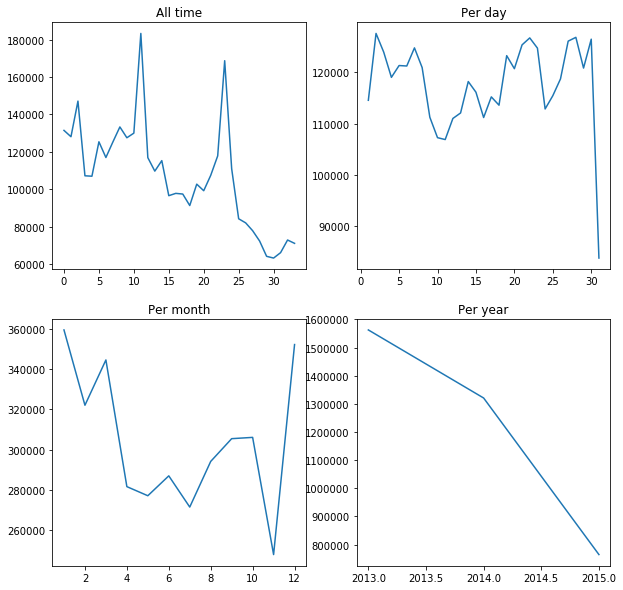

In [8]:
grouped_sales=sales_train.groupby(["date_block_num"])["item_cnt_day"].sum() # all time
grouped_sales_perday=sales_train.groupby(["day"])["item_cnt_day"].sum() # per day
grouped_sales_peryear=sales_train.groupby(["year"])["item_cnt_day"].sum() # per year
grouped_sales_permonth=sales_train.groupby(["month"])["item_cnt_day"].sum() # per month
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].plot(grouped_sales)
axs[0,0].set_title('All time')
axs[0,1].plot(grouped_sales_perday)
axs[0,1].set_title('Per day')
axs[1,0].plot(grouped_sales_permonth)
axs[1,0].set_title('Per month')
axs[1,1].plot(grouped_sales_peryear)
axs[1,1].set_title('Per year')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [95]:
sales_train["key_ID"] = sales_train["shop_id"].astype(str) + "_" + sales_train["item_id"].astype(str)
sales_train["time_ID"] = sales_train["date"].str.slice(start=6) + "_" + sales_train["date"].str.slice(start=3,stop=5)

## Shop sales distribution
The following plot shows the scaled sales for different shops across the considered time period. As you can see, there is correlation between some of the shops

/Users/chaaya/miniconda/envs/MLbase/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


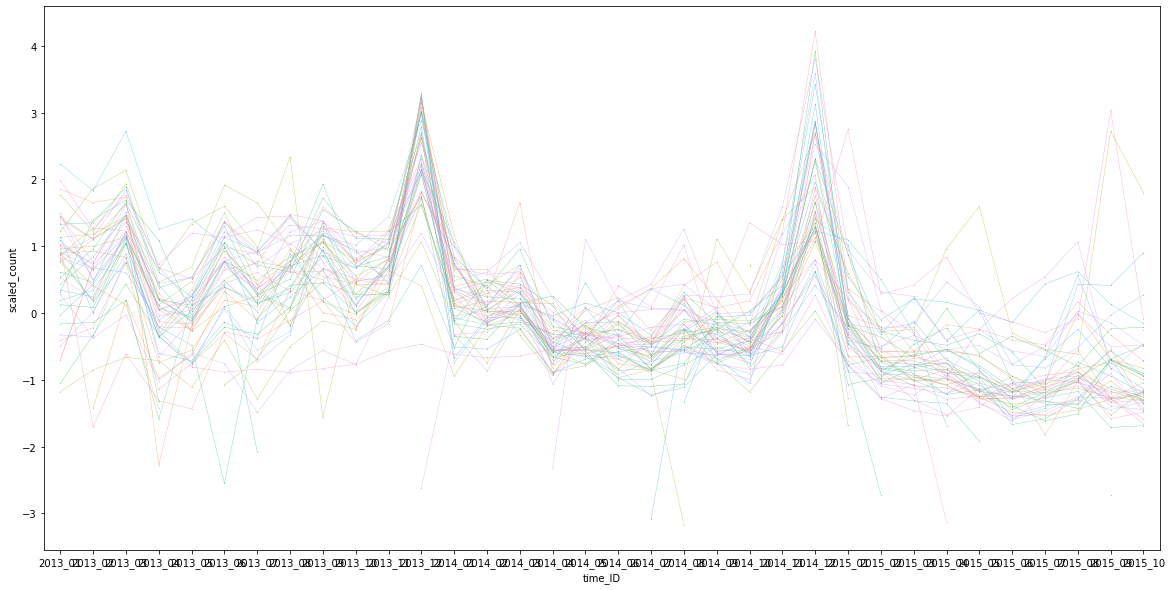

In [97]:
grouped_shop = pd.DataFrame(sales_train.groupby(['shop_id', 'time_ID'])['item_cnt_day'].sum().reset_index())
grouped_shop["scaled_count"] = grouped_shop.groupby('shop_id')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
g = sns.pointplot(x='time_ID', y='scaled_count', hue='shop_id', data=grouped_shop,scale=.1,figsize=(20,20))
ax.legend().remove()
fig.show()

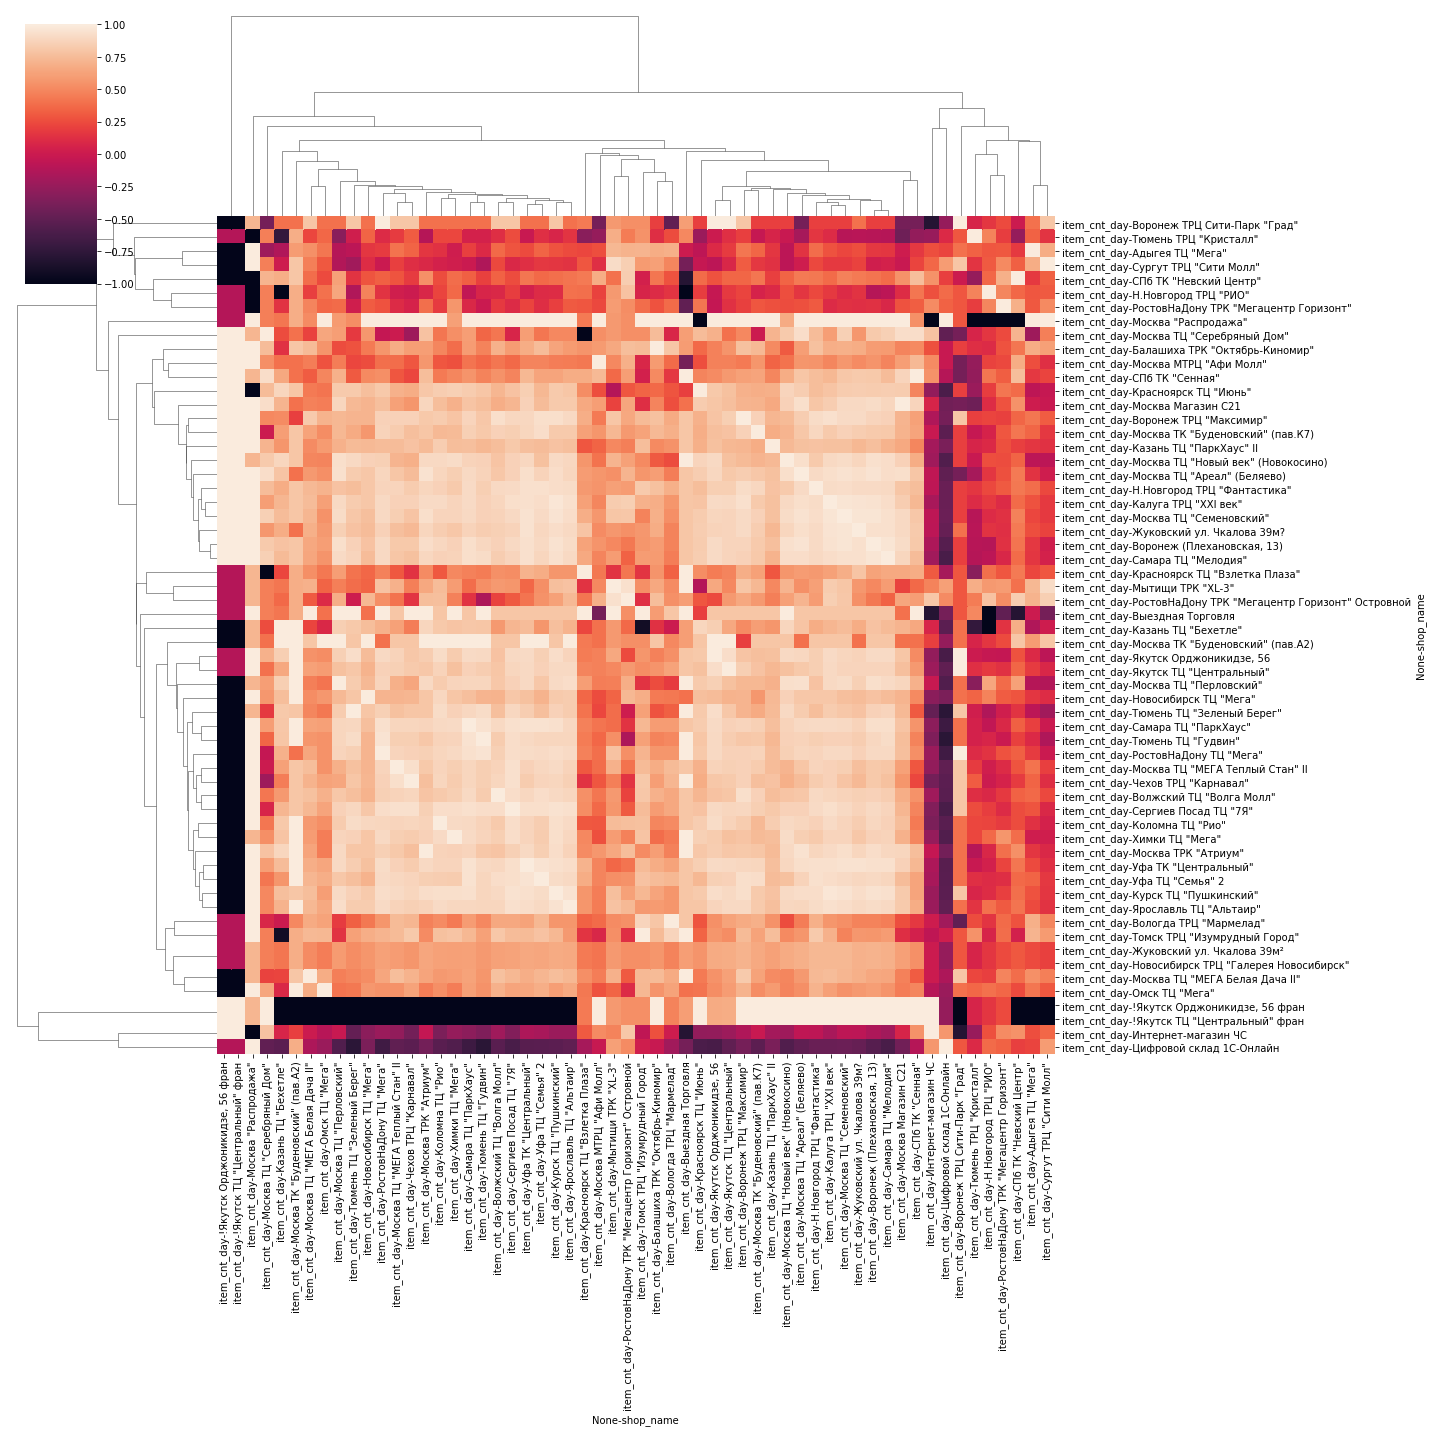

In [98]:
grouped_shop = pd.DataFrame(sales_train.groupby(['shop_name', 'time_ID'])['item_cnt_day'].sum().reset_index())
grouped_shop["item_cnt_day"] = grouped_shop.groupby('shop_name')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())

grouped_shop_unmelted = grouped_shop.pivot(columns="shop_name",index="time_ID")
var_corr = grouped_shop_unmelted.corr(method="spearman")
# plot the heatmap and annotation on it
var_corr.fillna(var_corr.mean(), inplace=True)
var_corr_filt = var_corr.loc[:,  ~var_corr.std(axis=0).isna() ]
sns.clustermap(data=var_corr_filt,figsize=(20,20))

## Item Category sales distribution

/Users/chaaya/miniconda/envs/MLbase/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


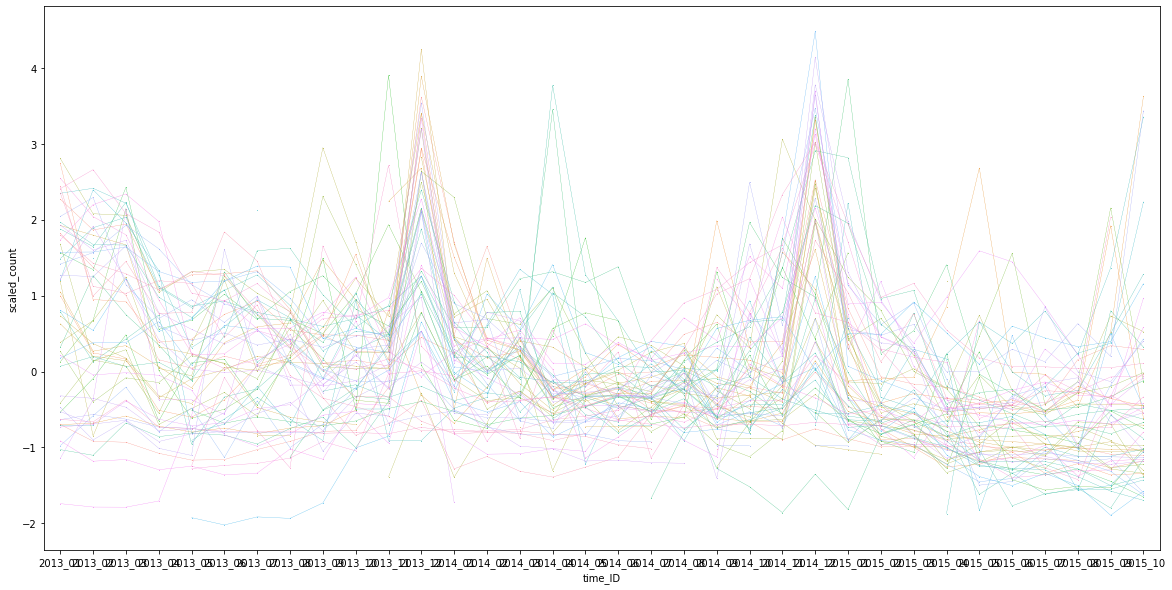

In [101]:
grouped_item_cat = pd.DataFrame(sales_train.groupby(['item_category_id', 'time_ID'])['item_cnt_day'].sum().reset_index())
grouped_item_cat["scaled_count"] = grouped_item_cat.groupby('item_category_id')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
g = sns.pointplot(x='time_ID', y='scaled_count', hue='item_category_id', data=grouped_item_cat,scale=.1,figsize=(20,20))
ax.legend().remove()
fig.show()

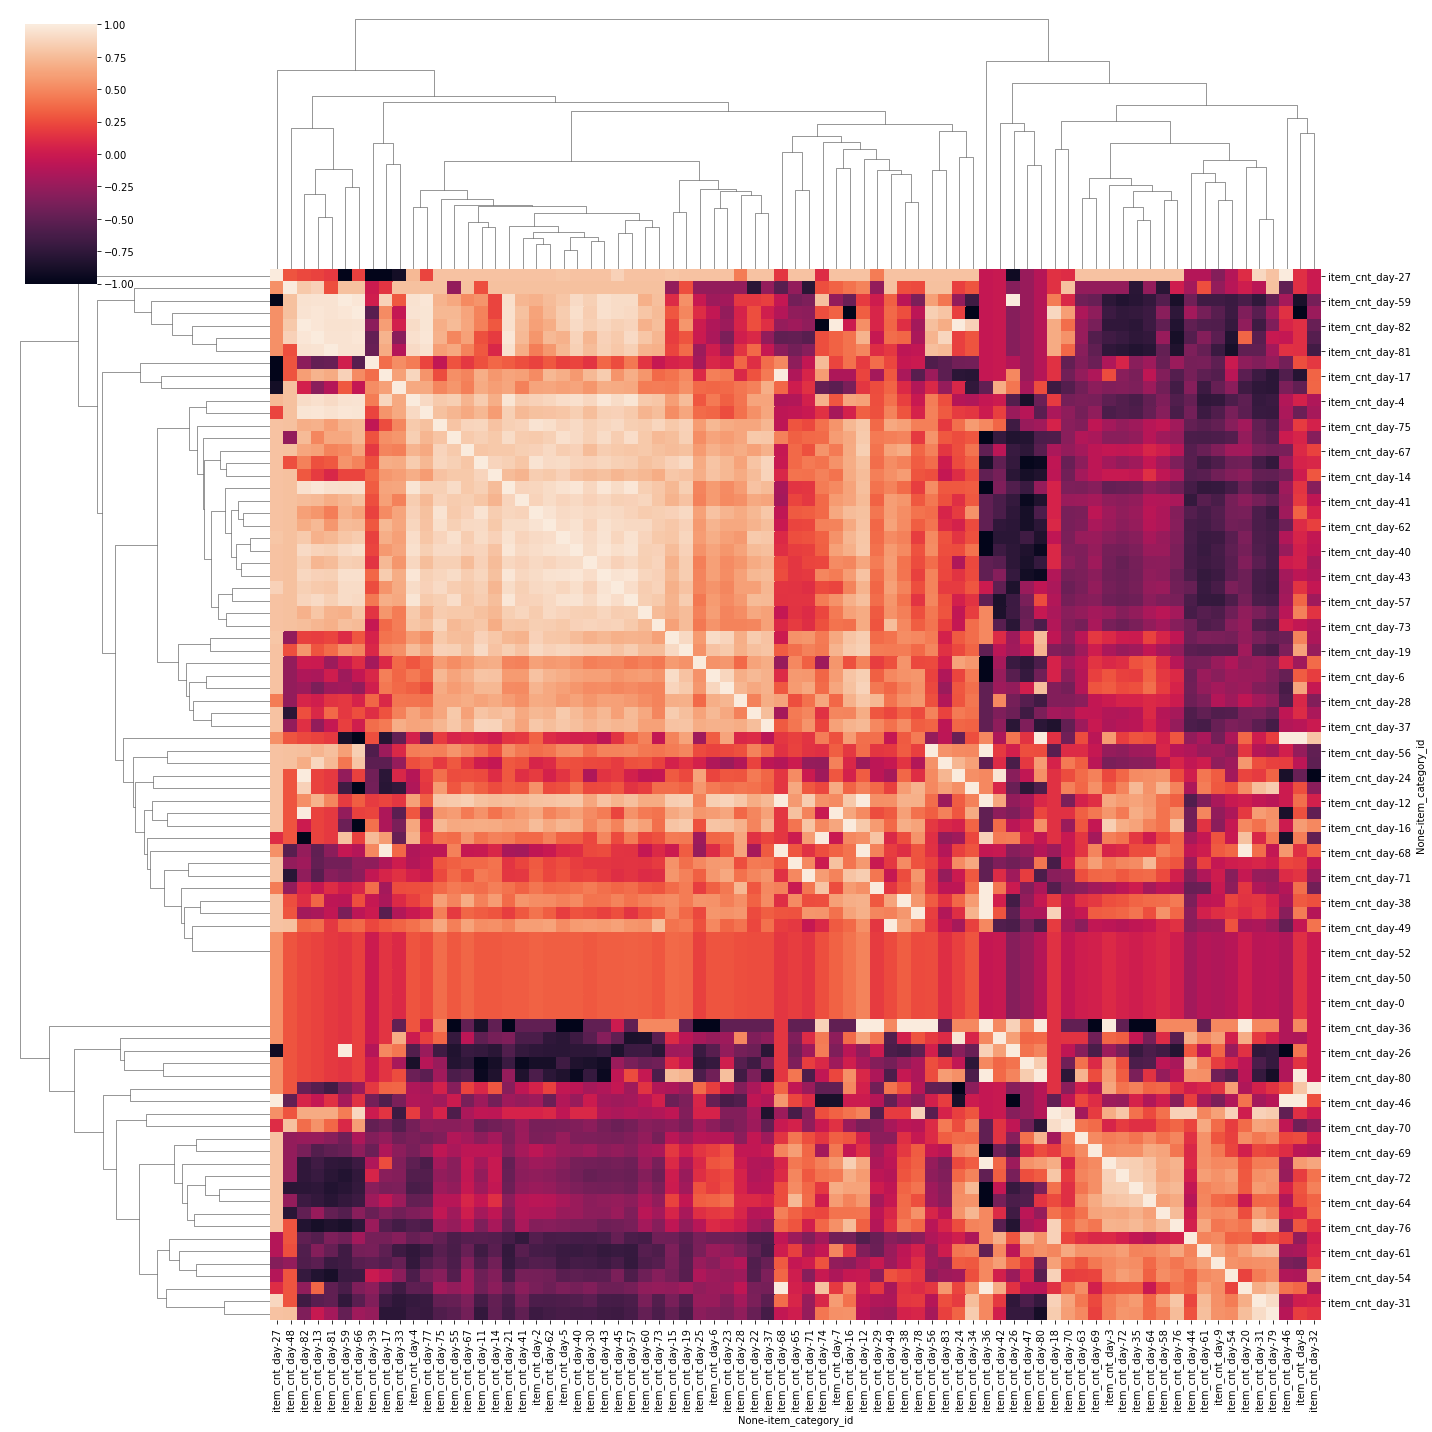

In [104]:
grouped_item_cat = pd.DataFrame(sales_train.groupby(['item_category_id', 'time_ID'])['item_cnt_day'].sum().reset_index())
grouped_item_cat["item_cnt_day"] = grouped_item_cat.groupby('item_category_id')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())

grouped_item_cat_unmelted = grouped_item_cat.pivot(columns="item_category_id",index="time_ID")
var_corr = grouped_item_cat_unmelted.corr(method="spearman")
# plot the heatmap and annotation on it
var_corr.fillna(var_corr.mean(), inplace=True)
var_corr_filt = var_corr.loc[:,  ~var_corr.std(axis=0).isna() ]
sns.clustermap(data=var_corr_filt,figsize=(20,20))

## City sales distribution


In [ ]:
grouped_city = pd.DataFrame(sales_train.groupby(['city', 'item_id'])['item_cnt_day'].sum().reset_index())
grouped_city["scaled_count"] = grouped_city.groupby('city')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
g = sns.pointplot(x='item_id', y='scaled_count', hue='city', data=grouped_city,scale=.1,figsize=(20,20))
ax.legend().remove()
fig.show()

In [ ]:
grouped_item_city = pd.DataFrame(sales_train.groupby(['city', 'item_id'])['item_cnt_day'].sum().reset_index())
grouped_item_city["item_cnt_day"] = grouped_item_city.groupby('city')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())

grouped_item_city_unmelted = grouped_item_city.pivot(columns="city",index="item_id")
var_corr = grouped_item_city_unmelted.corr(method="spearman")
# plot the heatmap and annotation on it
var_corr.fillna(var_corr.mean(), inplace=True)
var_corr_filt = var_corr.loc[:,  ~var_corr.std(axis=0).isna() ]
sns.clustermap(data=var_corr_filt,figsize=(20,20))

## Item subtype sales distribution

In [ ]:
grouped_sub = pd.DataFrame(sales_train.groupby(['subtype', 'item_id'])['item_cnt_day'].sum().reset_index())
grouped_sub["scaled_count"] = grouped_sub.groupby('subtype')["item_cnt_day"].transform(lambda x: (x - x.mean()) / x.std())

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
g = sns.pointplot(x='month', y='scaled_count', hue='subtype', data=grouped_sub,scale=.1,figsize=(20,20))
ax.legend().remove()
fig.show()

In [ ]:
grouped_subtype = pd.DataFrame(sales_train.groupby(['subtype', 'item_id'])['item_cnt_day'].sum().reset_index())
grouped_subtype_unmelted = grouped_subtype.pivot(columns="subtype",index="item_id")
var_corr = grouped_subtype_unmelted.corr()
# plot the heatmap and annotation on it
var_corr.fillna(var_corr.mean(), inplace=True)
var_corr_filt = var_corr.loc[:,  ~var_corr.std(axis=0).isna() ]
sns.clustermap(data=var_corr_filt,figsize=(20,20))